In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\Happy\Desktop\Naren Baskar\New folder\Copper_Set.xlsx - Result 1 (2).csv")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:

df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date
     

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181672 non-null  float64
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_1      181670 non-null  object 
 15  delivery_date_1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
mem

In [8]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [10]:
#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [11]:
df.isnull().sum()

id                     2
item_date              1
quantity tons          5
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          8
item_date_1            3
delivery_date_1        3
dtype: int64

In [12]:
# Handling null values using mean meadian and mode
# object columns and mode method
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)

In [13]:
#numarical column and median()
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [14]:
df.isnull().sum()

id                     2
item_date              0
quantity tons          0
customer               0
country                0
status                 0
item type              0
application            0
thickness              0
width                  0
material_ref       77919
product_ref            0
delivery date          0
selling_price          0
item_date_1            0
delivery_date_1        0
dtype: int64

In [15]:
# droping material ref bcz having high null values
df.drop(columns=['material_ref'],inplace=True)

In [16]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [17]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [18]:
# Encoding the catogorical columns

df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
df= df[df['status'].isin(['Won','Lost'])]

In [21]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [22]:
df['status'] = df['status'].map({'Won':1,'Lost':0})

In [23]:
df['status'].unique()

array([1, 0])

In [24]:
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [25]:
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [27]:
# converting float to int 
df['item type'] = df['item type'].astype(int)

In [28]:
df.dtypes

id                  object
item_date          float64
quantity tons      float64
customer           float64
country            float64
status               int64
item type            int64
application        float64
thickness          float64
width              float64
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery_date_1     object
dtype: object

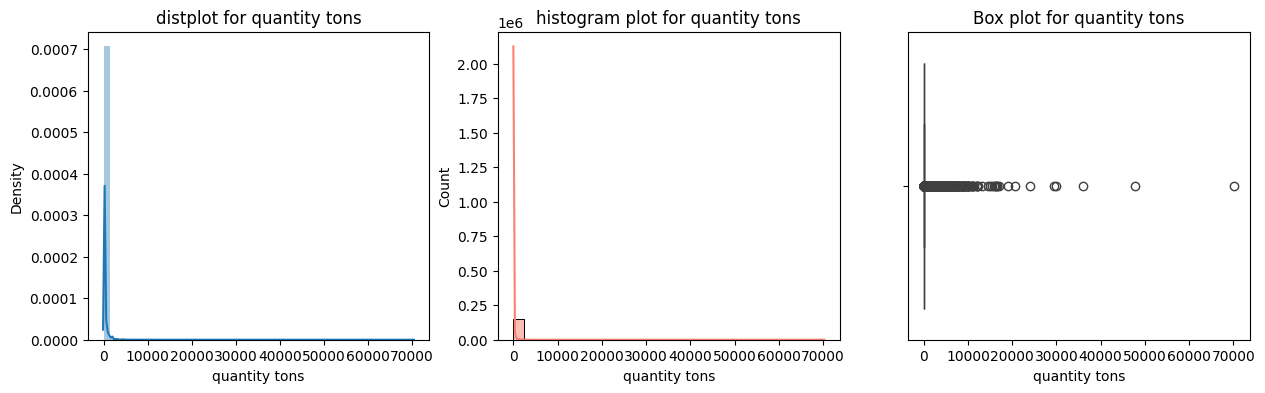

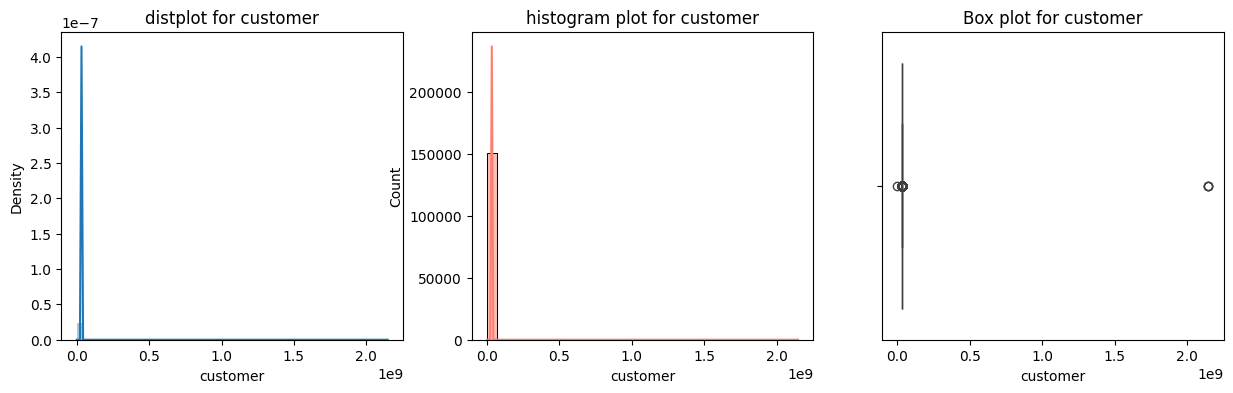

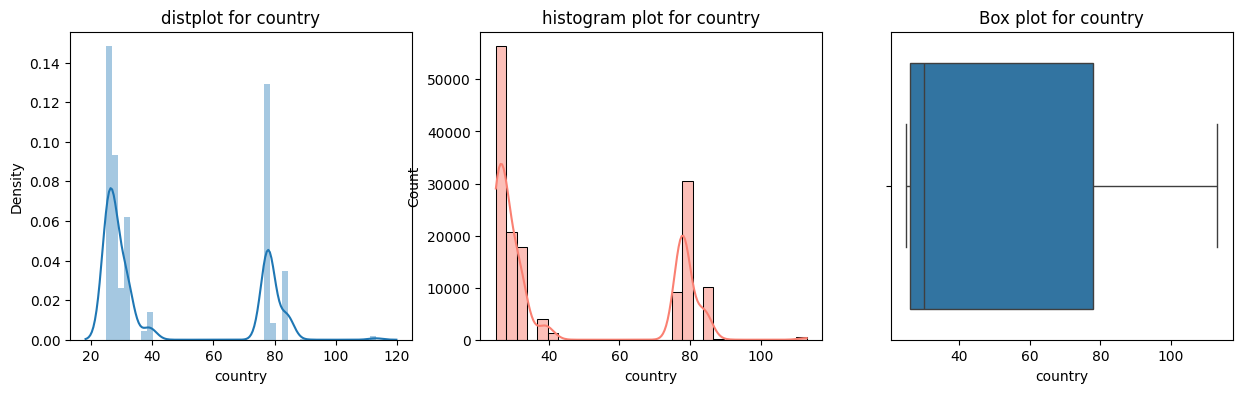

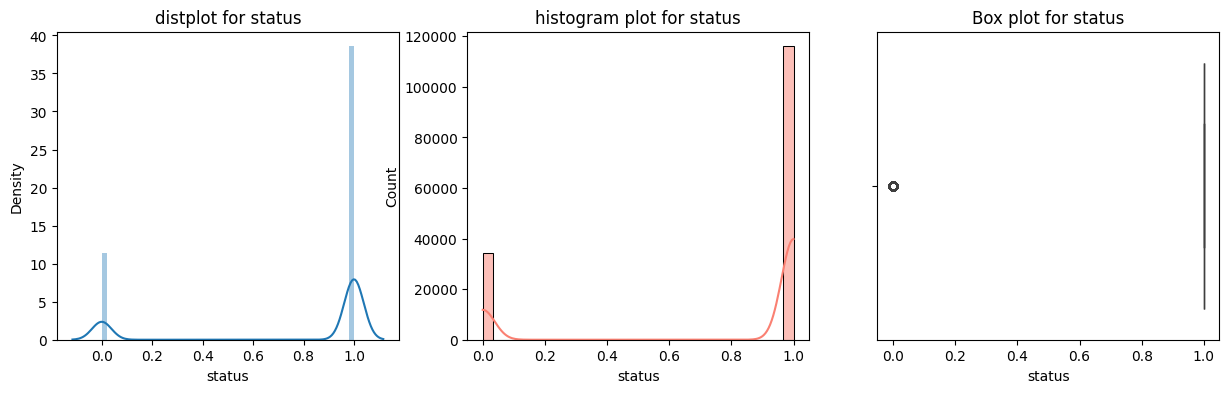

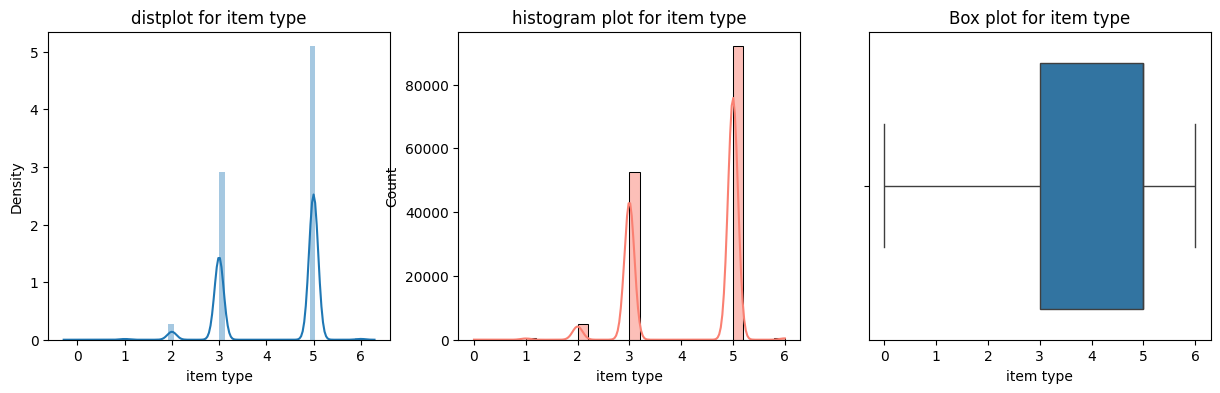

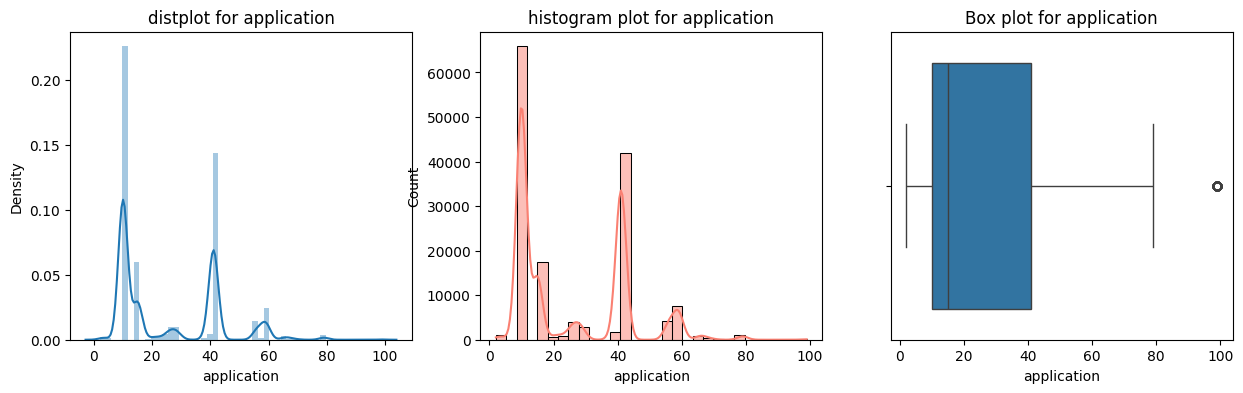

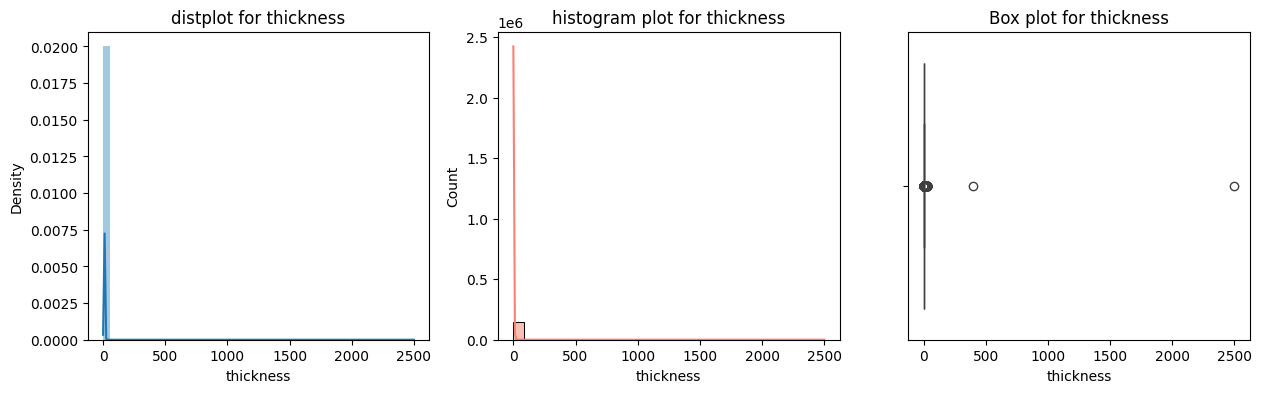

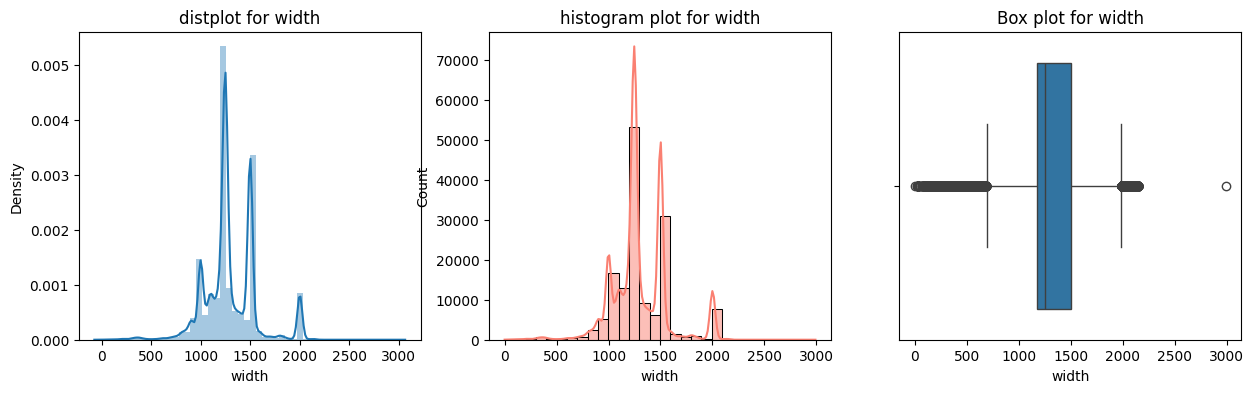

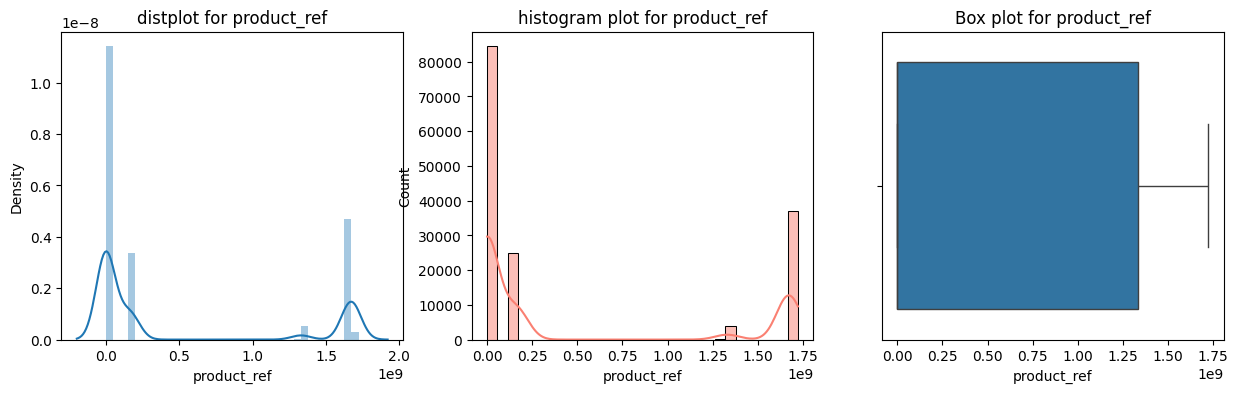

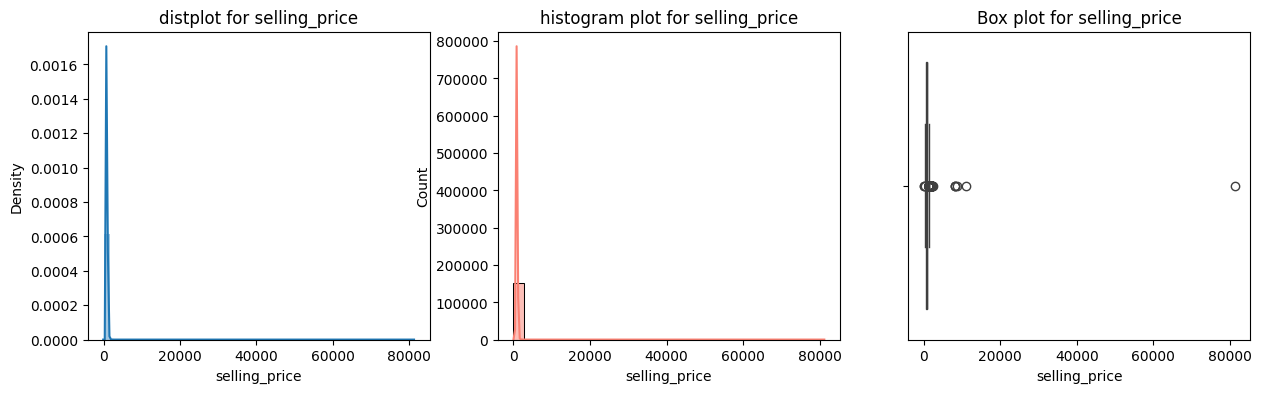

In [29]:
# skewness using log method
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)
     

skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']
     

for i in skewed_columns:
  plot(df,i)

In [30]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [31]:
df["quantity_tons_log"]= np.log(df["quantity tons"])
df["customer_log"]= np.log(df["customer"])
df["thickness_log"]= np.log(df["thickness"])
df["selling_price_log"]= np.log(df["selling_price"])

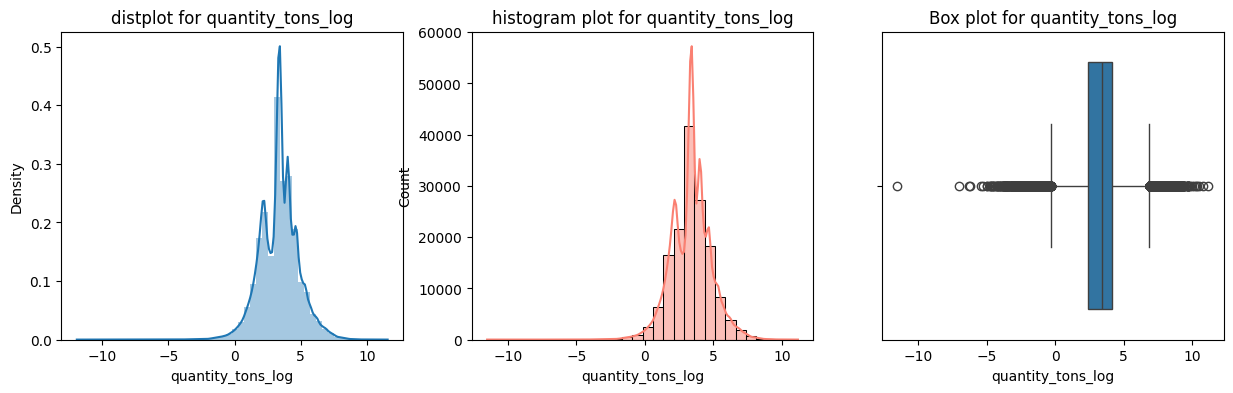

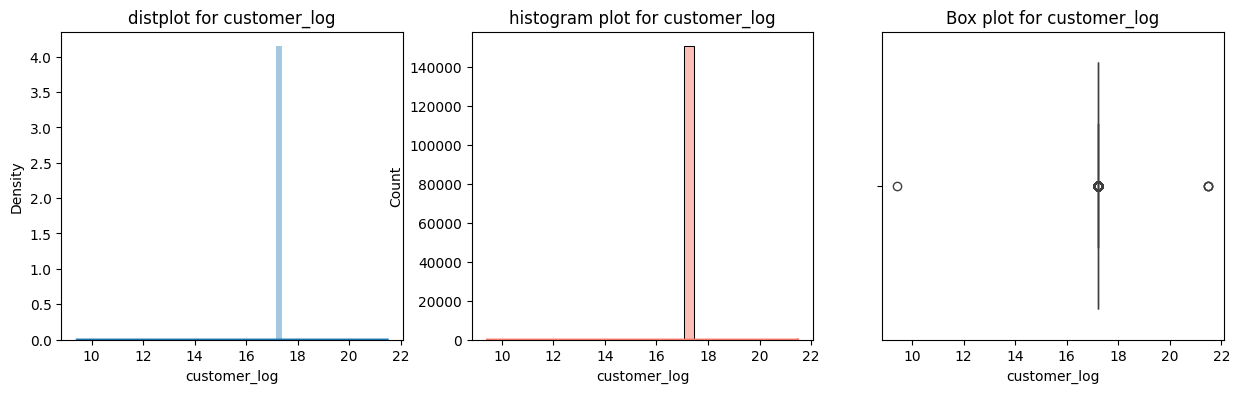

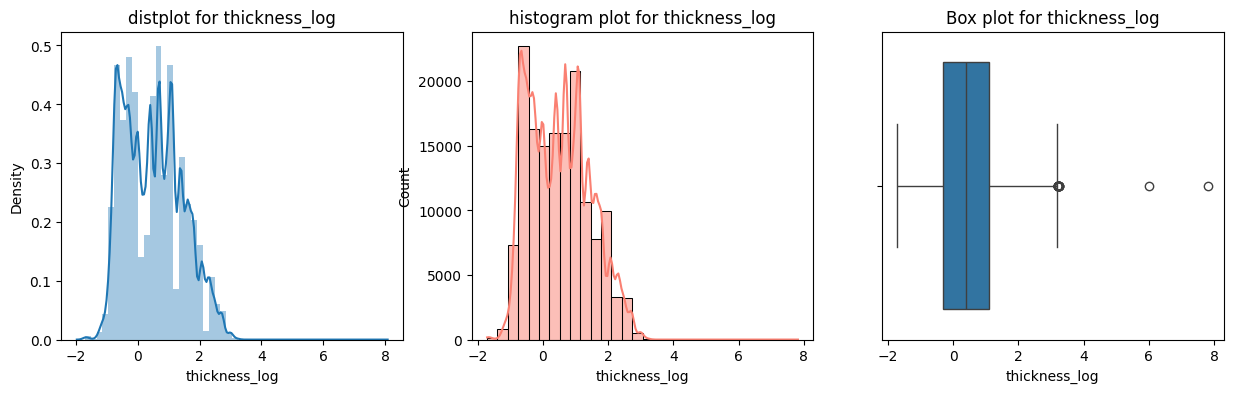

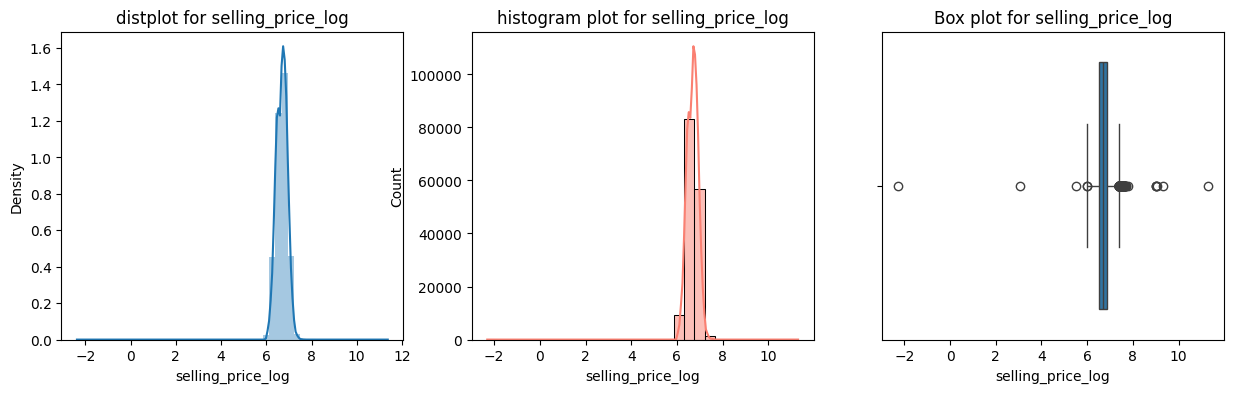

In [33]:
skwed_columns_2=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]
for i in skwed_columns_2:
  plot(df,i)

In [34]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [38]:
# droping the unwanted columns
df.drop(columns=['id','item_date','delivery date','customer','quantity tons','thickness','selling_price'],inplace=True)

In [39]:
df.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'item_date_1', 'delivery_date_1', 'quantity_tons_log', 'customer_log',
       'thickness_log', 'selling_price_log'],
      dtype='object')

In [40]:
# outliers detection - IQR method

def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [41]:
df.describe()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log
count,150450.000000,150450.000000,150450.000000,150450.000000,150450.000000,1.504500e+05,150450.000000,150450.000000,150450.000000,150450.000000
mean,45.390435,0.771100,4.192330,25.194703,1297.835317,4.748337e+08,3.373220,17.224478,0.504837,6.686954
std,24.487926,0.420126,1.049147,17.640140,266.158210,7.172603e+08,1.441653,0.027780,0.931560,0.241081
min,25.000000,0.000000,0.000000,2.000000,1.000000,6.117280e+05,-11.512925,9.430118,-1.714798,-2.302585
25%,26.000000,1.000000,3.000000,10.000000,1176.000000,6.283770e+05,2.370258,17.223249,-0.301105,6.508769
50%,30.000000,1.000000,5.000000,15.000000,1250.000000,6.406650e+05,3.399056,17.223528,0.405465,6.698268
75%,78.000000,1.000000,5.000000,41.000000,1500.000000,1.332077e+09,4.172369,17.225992,1.098612,6.857514
max,113.000000,1.000000,6.000000,99.000000,2990.000000,1.722208e+09,11.159849,21.487563,7.824046,11.305116


In [42]:
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
  outlier(df,i)

In [43]:
df.describe()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log
count,150450.000000,150450.000000,150450.000000,150450.000000,150450.000000,1.504500e+05,150450.000000,150450.000000,150450.000000,150450.000000
mean,45.390435,0.771100,4.192330,25.186142,1299.990281,4.748337e+08,3.373244,17.224444,0.504782,6.686835
std,24.487926,0.420126,1.049147,17.607079,254.042255,7.172603e+08,1.391039,0.002354,0.931299,0.238763
min,25.000000,0.000000,0.000000,2.000000,690.000000,6.117280e+05,-0.332909,17.219135,-1.714798,5.985652
25%,26.000000,1.000000,3.000000,10.000000,1176.000000,6.283770e+05,2.370258,17.223249,-0.301105,6.508769
50%,30.000000,1.000000,5.000000,15.000000,1250.000000,6.406650e+05,3.399056,17.223528,0.405465,6.698268
75%,78.000000,1.000000,5.000000,41.000000,1500.000000,1.332077e+09,4.172369,17.225992,1.098612,6.857514
max,113.000000,1.000000,6.000000,87.500000,1986.000000,1.722208e+09,6.875536,17.230106,3.198188,7.380631


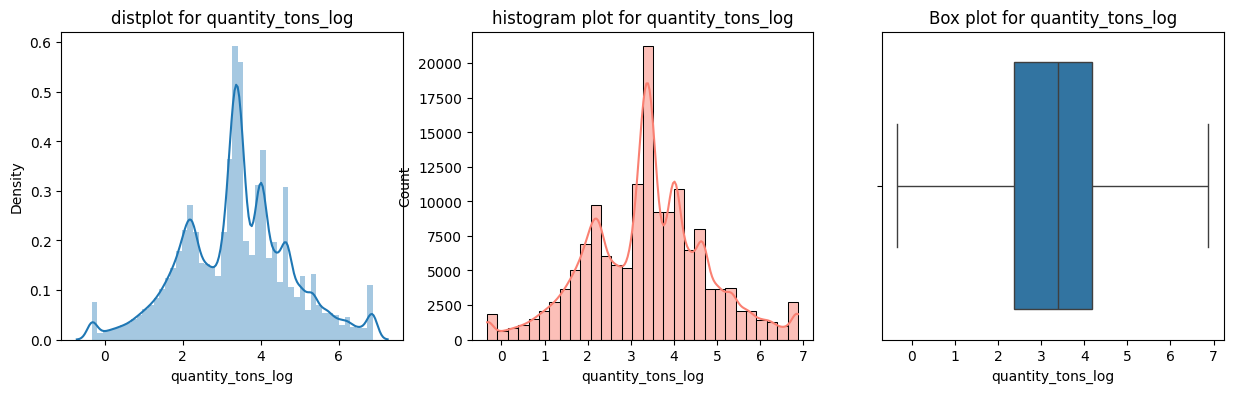

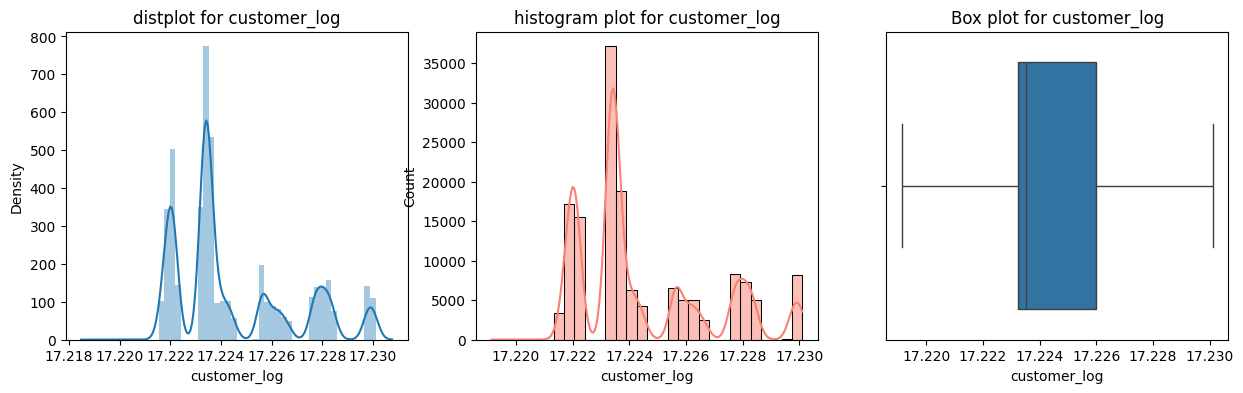

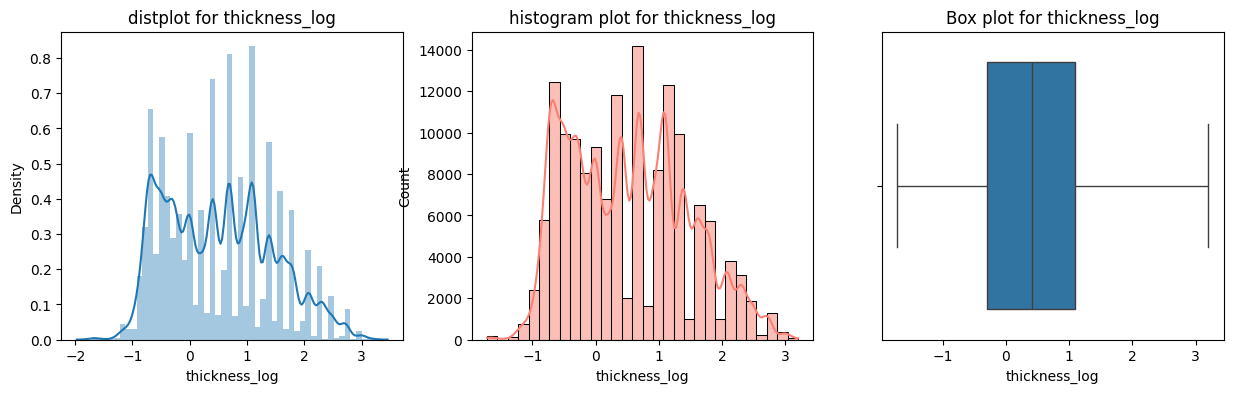

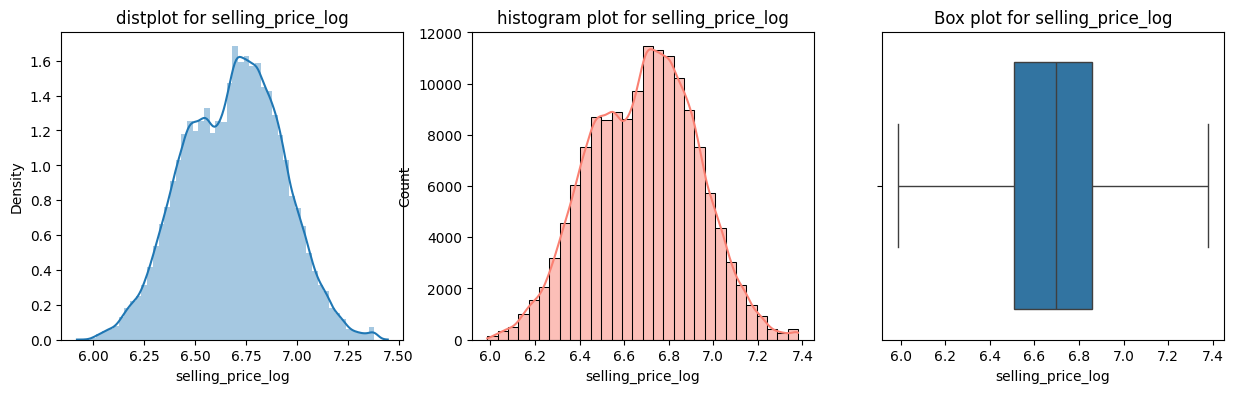

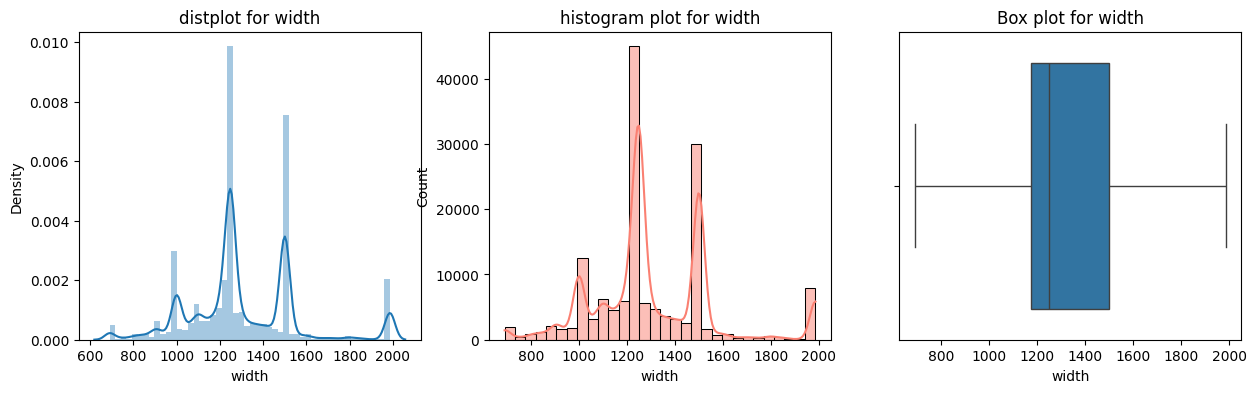

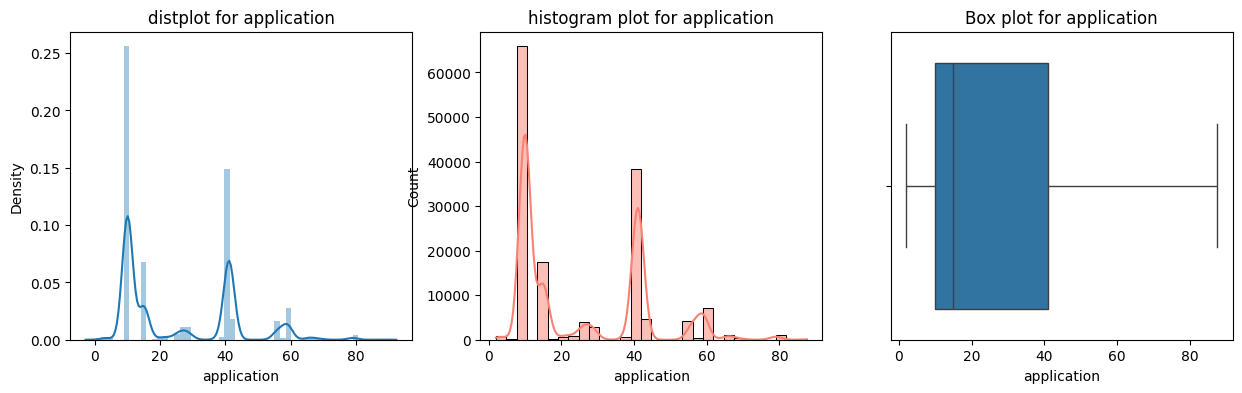

In [44]:
for i in outlier_columns:
  plot(df,i)

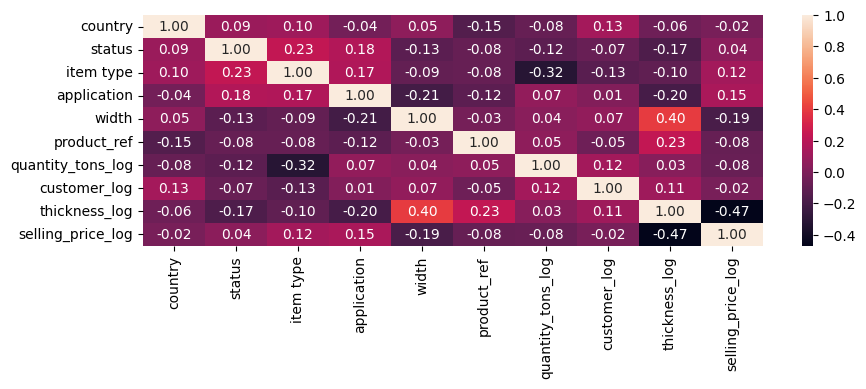

In [45]:
# correlation check

corr = df.drop(columns=['item_date_1','delivery_date_1']).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [46]:
# date prediction
#converting the datatype (object to datetime format)
df["delivery_date_1"]= pd.to_datetime(df["delivery_date_1"])
df["item_date_1"]= pd.to_datetime(df["item_date_1"])

In [47]:
df["date_differ"]= (df["delivery_date_1"]-df["item_date_1"]).dt.days

In [48]:
df['date_differ']

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 150450, dtype: int64

In [49]:
# there are neghative values we want to remove
df["item_date_day"]= df["item_date_1"].dt.day
df["item_date_month"]= df["item_date_1"].dt.month
df["item_date_year"]= df["item_date_1"].dt.year

In [50]:
df.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'item_date_1', 'delivery_date_1', 'quantity_tons_log', 'customer_log',
       'thickness_log', 'selling_price_log', 'date_differ', 'item_date_day',
       'item_date_month', 'item_date_year'],
      dtype='object')

In [51]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df_pv= df[df["date_differ"]>=0]
df_pv.reset_index(drop= True, inplace= True)

In [52]:
# negative value as well
df_nv= df[df["date_differ"]>=0]
df_nv.reset_index(drop= True, inplace= True)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [54]:

def accuracy_date_prediction(df, algorithm):
  x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= df["date_differ"]

  #teain test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train,y_train)
  y_pred= model.predict(x_test)

  #checking the accuracy score
  mse= mean_squared_error(y_test, y_pred)
  rmse= np.sqrt(mse)
  mae= mean_absolute_error(y_test,y_pred)
  r2= r2_score(y_test, y_pred)

  metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
  return metrics

In [55]:
print(accuracy_date_prediction(df_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df_pv,RandomForestRegressor))
print(accuracy_date_prediction(df_pv,XGBRegressor))

{'R2_score': 0.8904118967976623, 'Mean_squared_error': np.float64(168.83092160977944), 'Root_mean_squared_error': np.float64(12.993495357669524), 'Mean_absolute_error': np.float64(3.221731286129828)}
{'R2_score': 0.9459304152380046, 'Mean_squared_error': np.float64(83.29935056519017), 'Root_mean_squared_error': np.float64(9.12684778908853), 'Mean_absolute_error': np.float64(3.4606826466364744)}
{'R2_score': 0.843590497970581, 'Mean_squared_error': np.float64(240.96372375333112), 'Root_mean_squared_error': np.float64(15.523006273055845), 'Mean_absolute_error': np.float64(10.443769024846127)}


In [72]:
def RandomForest(train_df, test_df):

  x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
  y= train_df["date_differ"]

  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= RandomForestRegressor().fit(x_train, y_train)

  data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])

  y_pred=model.predict(data)

  return y_pred

In [73]:
date_difference= RandomForest(df_pv,df_nv)

In [74]:
date_difference

array([113.21,   1.98,   0.  , ...,  34.56,  34.36,  33.65])

In [75]:
date_difference_1= []
for i in date_difference:
  dd= int(round(i,0))
  date_difference_1.append(dd)

In [76]:
date_difference_1

[113,
 2,
 0,
 103,
 0,
 89,
 99,
 0,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 83,
 0,
 0,
 74,
 0,
 0,
 66,
 97,
 1,
 74,
 30,
 15,
 142,
 44,
 0,
 122,
 34,
 0,
 123,
 31,
 0,
 31,
 0,
 30,
 2,
 32,
 0,
 99,
 93,
 0,
 93,
 0,
 93,
 0,
 130,
 59,
 95,
 91,
 19,
 91,
 153,
 90,
 153,
 91,
 153,
 91,
 153,
 91,
 153,
 92,
 153,
 122,
 91,
 92,
 153,
 115,
 91,
 116,
 153,
 117,
 91,
 149,
 153,
 146,
 91,
 148,
 154,
 145,
 91,
 95,
 153,
 92,
 91,
 92,
 153,
 92,
 91,
 122,
 154,
 122,
 91,
 122,
 153,
 122,
 91,
 122,
 90,
 122,
 91,
 122,
 96,
 122,
 91,
 122,
 97,
 123,
 91,
 122,
 91,
 122,
 91,
 126,
 91,
 122,
 90,
 105,
 92,
 183,
 90,
 183,
 91,
 183,
 91,
 183,
 91,
 183,
 91,
 183,
 99,
 183,
 91,
 183,
 67,
 183,
 91,
 183,
 120,
 183,
 91,
 183,
 117,
 183,
 91,
 183,
 183,
 91,
 183,
 90,
 183,
 91,
 183,
 126,
 183,
 91,
 183,
 91,
 180,
 91,
 182,
 91,
 183,
 91,
 183,
 91,
 183,
 97,
 183,
 91,
 183,
 91,
 183,
 91,
 183,
 183,
 183,
 183,
 183,
 91,
 183,
 91

In [77]:
df_nv["date_differ"]= pd.DataFrame(date_difference_1)

In [78]:
df_nv.isnull().sum()

country              0
status               0
item type            0
application          0
width                0
product_ref          0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [79]:
def find_delivery_date(item_date, date_differ):
  date= item_date + pd.to_timedelta(date_differ,unit= "D")
  return date

df_nv["delivery_date_1"]= find_delivery_date(df_nv["item_date_1"],df_nv["date_differ"])
     

# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df_pv,df_nv],axis=0,ignore_index=True)

In [81]:
df_final.head()

,country,status,item type,application,width,product_ref,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,28.0,1,5,10.0,1500.0,1670798778,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,25.0,1,5,41.0,1210.0,1668701718,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,25.0,1,5,41.0,1265.0,1668701718,2021-04-01,2021-04-01,5.419608,17.223450,0.405465,6.890609,0,1,4,2021
3,38.0,1,3,10.0,1275.0,1668701376,2021-04-01,2021-07-01,4.235147,17.228025,-0.510826,7.217443,91,1,4,2021
4,25.0,1,5,41.0,1165.0,1668701718,2021-04-01,2021-04-01,6.446714,17.223450,0.405465,6.890609,0,1,4,2021


In [82]:
df_final['delivery_date_day']= df_final["delivery_date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery_date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery_date_1"].dt.year

In [83]:
df_final.drop(columns=['delivery_date_1','item_date_1'],inplace=True)

In [85]:
df_final.drop(columns=['date_differ'],inplace=True)

In [86]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [94]:
# saving the model
df_final.to_csv("Industrial_copper.csv",index=True)

In [95]:
df_final = pd.read_csv(r"C:\Users\Happy\Desktop\Naren Baskar\New folder\Industrial_copper.csv")

In [96]:
df_final.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'country', 'status', 'item type',
       'application', 'width', 'product_ref', 'quantity_tons_log',
       'customer_log', 'thickness_log', 'selling_price_log', 'item_date_day',
       'item_date_month', 'item_date_year', 'delivery_date_day',
       'delivery_date_month', 'delivery_date_year'],
      dtype='object')

In [97]:
df_final.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)


In [98]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [99]:
# classification model predict Win/lost

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import pickle

In [101]:
df_final['status'].value_counts()

status
1    203970
0     67618
Name: count, dtype: int64

In [102]:
# here it is imbalanced data

x= df_final.drop(columns=["status"],axis=1)
y= df_final["status"]

In [103]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [104]:
y_new.value_counts()

status
1    203260
0    203260
Name: count, dtype: int64

In [105]:
# now the data is imbalanced 
# go for ML Algo

def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [106]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9831127619797304}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9922390042310342}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.950168503394667, 'Accuracy_Test': 0.9470874741710125}


In [108]:
# here Random forest is best accuracy but training accuracy has overfitting
x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "n_estimators":[10]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20], 'n_estimators': [10]})

In [112]:
gridsearch.cv_results_

{'mean_fit_time': array([10.6585433 , 14.18069553, 23.00796962, 27.26937933]),
 'std_fit_time': array([1.33819823, 0.79371324, 0.40436913, 3.49550457]),
 'mean_score_time': array([0.1856215 , 0.22462749, 0.31805906, 0.46350446]),
 'std_score_time': array([0.02462297, 0.01505221, 0.0156446 , 0.10338848]),
 'param_max_depth': masked_array(data=[2, 5, 10, 20],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 5, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 20, 'n_estimators': 10}],
 'split0_test_score': array([0.70389275, 0.74423467, 0.86984195, 0.97550889]),
 'split1_test_score': array([0.68196424, 0.75440862, 0.87758867, 0.97500115]),
 'split2_test_score': array([0.68548499, 0.74313915, 0.86104577, 0.97532402]),
 'split3_test_sco

In [109]:
gridsearch.best_score_

np.float64(0.9742571052722468)

In [110]:
gridsearch.best_params_

{'max_depth': 20, 'n_estimators': 10}

In [113]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20,n_estimators=10).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.986940986913313
Accuracy_Test:  0.9762250319787464
  
Confution_matrix for Test
--------------------------
[[40186   320]
 [ 1613 39185]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     40506
           1       0.99      0.96      0.98     40798

    accuracy                           0.98     81304
   macro avg       0.98      0.98      0.98     81304
weighted avg       0.98      0.98      0.98     81304



In [114]:
# ROC CURVE AND AUC CURVE   
FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.00790006 1.        ]
[0.         0.96046375 1.        ]
 
auc_curve: 0.9762818420174653


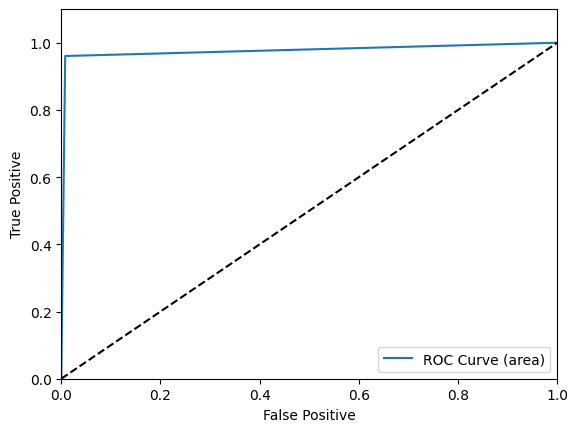

In [115]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [116]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [117]:
# saving the model using pickle
with open("Industrial_Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [118]:
with open(r"C:\Users\Happy\Desktop\Naren Baskar\New folder\Industrial_Classification_model.pkl","rb") as f1:
  class_model= pickle.load(f1)

In [119]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


In [120]:
# REgression model Predict the selling price

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [121]:
def accuracy_regressor(df,algorithm):

  x= df.drop(columns=["selling_price_log"], axis=1)
  y= df["selling_price_log"]

  #train test splitting
  x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  r2_train= r2_score(y_train, y_pred_train)
  r2_test= r2_score(y_test, y_pred_test)

  metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

  return metrics

In [122]:
print(accuracy_regressor(df_final, DecisionTreeRegressor))
print(accuracy_regressor(df_final, RandomForestRegressor))
print(accuracy_regressor(df_final, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999189458082612, 'R2_Test': 0.9755216970588032}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9976801053434605, 'R2_Test': 0.9825934488916903}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9567207530830554, 'R2_Test': 0.9533574917944947}


In [123]:

x= df_final.drop(columns=["selling_price_log"], axis=1)
y= df_final["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "n_estimators":[10]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20], 'n_estimators': [10]})

In [124]:
gridsearch_r.cv_results_

{'mean_fit_time': array([11.48687711, 16.17006607, 40.25997448, 45.2662106 ]),
 'std_fit_time': array([0.80376309, 0.66994136, 5.27845941, 5.4204601 ]),
 'mean_score_time': array([0.09388065, 0.10326457, 0.19035611, 0.51286669]),
 'std_score_time': array([0.02141515, 0.01423145, 0.01429755, 0.13935283]),
 'param_max_depth': masked_array(data=[2, 4, 10, 20],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 4, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 20, 'n_estimators': 10}],
 'split0_test_score': array([0.65218571, 0.78943554, 0.92334999, 0.97350481]),
 'split1_test_score': array([0.65726818, 0.79094587, 0.92096158, 0.97275452]),
 'split2_test_score': array([0.66209109, 0.79505382, 0.92393396, 0.97380475]),
 'split3_test_sco

In [125]:
gridsearch_r.best_score_

np.float64(0.9732109124631083)

In [126]:
gridsearch_r.best_params_

{'max_depth': 20, 'n_estimators': 10}

In [127]:
# checking for acuracy and overfitting
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20,n_estimators=10).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.9907222238596677, 0.9762118131588231)

In [128]:
x = df_final.drop(columns=['selling_price_log'], axis=1)
y = df_final['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20,n_estimators=10).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.976230660461784,
 'Mean Absolute Error': np.float64(0.02208612620483153),
 'Mean Squared Error': np.float64(0.0013298635758059564),
 'Root Mean Squared Error': np.float64(0.036467294604973874)}

In [129]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.070899046804442
Predicted selling price without Log:  1177.205921854895


In [130]:
# saving the model using pickle
with open("Industrial_regression_model.pkl","wb") as r:
    pickle.dump(model_r,r)

In [132]:
df_final.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
271583,25.0,0,3,15.0,1986.0,640665,3.472467,17.224270,1.791759,6.313548,2,7,2020,11,8,2020
271584,30.0,0,3,10.0,1525.0,640665,4.196171,17.222079,1.348073,6.126869,2,7,2020,6,8,2020
271585,30.0,0,3,10.0,1525.0,640665,4.156686,17.222079,1.766442,6.124683,2,7,2020,6,8,2020
271586,30.0,0,3,10.0,1500.0,640665,4.025862,17.222079,2.060514,6.126869,2,7,2020,5,8,2020
271587,30.0,0,3,10.0,1830.0,640665,5.328963,17.222079,1.348073,6.131226,2,7,2020,5,8,2020
